<a href="https://colab.research.google.com/github/MCPMAlf/An-lisis-de-Datos/blob/main/Proyecto4_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
#Importa paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy, MSE,MAE

In [182]:
#Lectura de datos
Datos = pd.read_csv('/content/creditcard.csv')

#Vizualizacion de los datos
Datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [183]:
Prueba = Datos.copy()

Max_col = Datos.max()
Min_col = Datos.min()


In [184]:
#Estandariza datos para que tengan valores entre -1 y 1
for i in range(1,len(Prueba.columns)-1):
  if(np.abs(Max_col[i]) > np.abs(Min_col[i]) ):
    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Max_col[i])
  else:
    Prueba.iloc[:, i] = Prueba.iloc[:, i] / np.abs(Min_col[i])

In [185]:
#Visualización de datos estandarizados y no estandarizados.
Max_col_prueba = Prueba.max()
Min_col_prueba = Prueba.min()

print(Max_col_prueba)
print(Min_col_prueba)
print(Max_col)
print(Min_col)

Time      172792.000000
V1             0.043521
V2             0.303342
V3             0.194153
V4             1.000000
V5             0.305967
V6             1.000000
V7             1.000000
V8             0.273260
V9             1.000000
V10            0.965710
V11            1.000000
V12            0.420066
V13            1.000000
V14            0.547860
V15            1.000000
V16            1.000000
V17            0.367746
V18            0.530709
V19            0.775206
V20            0.723350
V21            0.781009
V22            0.960665
V23            0.502780
V24            1.000000
V25            0.730384
V26            1.000000
V27            1.000000
V28            1.000000
Amount         1.000000
Class          1.000000
dtype: float64
Time      0.000000
V1       -1.000000
V2       -1.000000
V3       -1.000000
V4       -0.336774
V5       -1.000000
V6       -0.356888
V7       -0.361203
V8       -1.000000
V9       -0.861434
V10      -1.000000
V11      -0.399160
V12      -1.0

In [186]:
Datos_Analisis = Prueba.copy()

In [187]:
Datos_Analisis = Datos_Analisis.drop(['Time'], axis = 1)
Datos_Analisis

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.024107,-0.001001,0.052485,0.081667,-0.002974,0.006308,0.001987,0.001348,0.023327,0.003693,...,-0.000526,0.025412,-0.002466,0.014599,0.012485,-0.053766,0.004225,-0.000622,0.005824,0
1,0.021129,0.003660,0.003445,0.026557,0.000528,-0.001124,-0.000653,0.001162,-0.016379,-0.006791,...,-0.006482,-0.058416,0.002261,-0.074129,0.016237,0.035792,-0.000284,0.000435,0.000105,0
2,-0.024081,-0.018430,0.036693,0.022505,-0.004424,0.024563,0.006563,0.003383,-0.097124,0.008445,...,0.007120,0.070582,0.020296,-0.150349,-0.031824,-0.039546,-0.001751,-0.001765,0.014739,0
3,-0.017130,-0.002547,0.037102,-0.051157,-0.000091,0.017015,0.001970,0.005155,-0.088940,-0.002235,...,-0.003109,0.000482,-0.004247,-0.256421,0.062880,-0.063096,0.001984,0.001816,0.004807,0
4,-0.020533,0.012071,0.032048,0.023883,-0.003580,0.001309,0.004917,-0.003695,0.052436,0.030627,...,-0.000271,0.073015,-0.003068,0.030814,-0.020010,0.142804,0.006941,0.006356,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.210630,0.138509,-0.203511,-0.122466,-0.047163,-0.035563,-0.040785,0.099777,0.122759,0.177165,...,0.006128,0.010232,0.022641,-0.111101,0.139558,0.071086,0.029851,0.024336,0.000030,0
284803,-0.012991,-0.000757,0.042111,-0.043767,0.007633,0.014439,0.000202,0.004027,0.037499,-0.039691,...,0.006150,0.084549,0.000278,-0.221663,-0.058922,-0.112373,0.002166,-0.001581,0.000965,0
284804,0.034030,-0.004143,-0.067245,-0.033056,0.023127,0.041353,-0.002461,0.009676,0.027730,-0.019716,...,0.006662,0.052888,-0.000837,0.139629,0.025812,-0.024840,0.000141,-0.000785,0.002642,0
284805,-0.004263,0.007295,0.014537,0.040876,-0.003323,0.008509,-0.005690,0.009276,0.025142,-0.016232,...,0.007615,0.073176,-0.003644,0.026874,-0.055283,0.155421,0.003442,0.003088,0.000389,0


In [188]:
import math 
Longitud_Datos_Train = math.floor(len(Datos_Analisis)*.73)
Longitud_Datos_Test = len(Datos_Analisis) - Longitud_Datos_Train

print(Longitud_Datos_Test, Longitud_Datos_Train)

76898 207909


In [189]:
#Creación de muestra aleatoria para datos de entrenamiento y prueba.
#Entrena la red para reconocer los movimientos considerados no fraudulentos.
Datos_Train = Datos_Analisis.sample(Longitud_Datos_Train)
Datos_Test = Datos_Analisis.drop(Datos_Train.index)

#print(len(Datos_Train))
#print(len(Datos_Test))

In [190]:
Datos_Train = Datos_Train.reset_index().drop(["index"], axis = 1)
Datos_Test = Datos_Test.reset_index().drop(["index"], axis = 1)

In [191]:
Datos_Train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.028772,0.031793,-0.019705,0.032508,0.004725,-0.006177,0.007392,0.004645,-0.000408,0.061535,...,0.000396,0.055142,-0.006240,-0.090203,0.019449,-0.118586,0.004395,-0.003032,0.000169,0
1,0.005412,0.002177,0.031086,0.009307,-0.003777,-0.001979,-0.000170,-0.000983,0.056788,-0.004106,...,0.003973,0.069293,0.005095,0.000925,-0.186471,0.081048,0.004718,0.002224,0.000428,0
2,0.002463,0.017765,0.002460,0.118695,0.005378,-0.013929,0.011415,-0.005947,-0.086906,0.014893,...,0.007798,0.083456,-0.004854,0.093213,-0.013983,-0.031129,0.006387,0.005359,0.000973,0
3,-0.009160,0.005111,0.049618,0.011442,0.000330,-0.003800,0.005284,-0.006455,0.027168,-0.005964,...,0.002235,0.074167,-0.007821,0.109188,-0.020603,0.104252,-0.009204,-0.009780,0.001164,0
4,0.021563,-0.008834,0.005363,-0.033550,-0.008224,-0.011735,-0.002503,-0.003020,-0.064704,0.022896,...,0.008970,0.066618,-0.002592,0.098815,0.049014,-0.033130,0.000009,0.000723,0.003338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207904,-0.008155,0.013049,0.030043,-0.012708,0.001642,-0.005626,0.004703,0.001420,-0.040562,-0.005659,...,-0.005586,-0.049669,-0.001532,-0.003377,-0.017307,0.021046,0.008223,0.003200,0.000089,0
207905,0.021081,-0.025064,0.026283,-0.056416,-0.019501,0.008044,-0.014945,0.005267,-0.051453,0.050804,...,-0.001270,0.039396,-0.001909,0.051996,0.030617,0.001881,0.002599,0.000760,0.003409,0
207906,0.019249,0.000139,0.015091,0.081967,-0.003784,0.002594,-0.002310,0.003114,0.021453,0.000946,...,0.000777,0.026875,-0.001663,0.049881,0.056979,-0.076742,0.001470,0.000283,0.000389,0
207907,-0.003047,0.024554,0.001877,0.175868,0.013342,-0.009732,0.013878,-0.005288,-0.147402,0.046105,...,0.007034,0.057745,-0.004347,0.008387,-0.045747,-0.000173,0.000928,0.006057,0.000148,0


In [192]:
y_Datos_test = Datos_Test["Class"]
Indices_Fraude = y_Datos_test[y_Datos_test == 1].index

In [193]:
y_Datos_train = Datos_Train["Class"].to_numpy()
y_Datos_test = Datos_Test["Class"].to_numpy()

In [194]:
type(y_Datos_test)

numpy.ndarray

In [195]:
y_Datos_test[Indices_Fraude[0]]

1

In [196]:
#Elimina la columna "Class"
Datos_Train.drop(["Class"], axis = 1, inplace = True)
Datos_Test.drop(["Class"], axis = 1, inplace = True)

print(Datos_Train.columns)
print(Datos_Test.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [197]:
#Convierte el DataFrame en un np.ndarray
x_Valores_Train = Datos_Train.values
x_Valores_Test = Datos_Test.values

In [198]:
x_Valores_Train.shape

(207909, 29)

In [199]:
#Creación de categorías para los datos de salida
num_classes = 2
y_Datos_Train_Cat = keras.utils.to_categorical(y_Datos_train, num_classes)
y_Datos_Test_Cat = keras.utils.to_categorical(y_Datos_test, num_classes)

print(y_Datos_Test_Cat[Indices_Fraude[0]])
print(y_Datos_Test_Cat.shape)

[0. 1.]
(76898, 2)


In [200]:
y_Datos_train

array([0, 0, 0, ..., 0, 0, 0])

In [219]:
#Parámetros
Learning_Rate = 0.01789
epochs = 100
batch_size = 80

In [220]:
#Modelo de red neuronal
model = Sequential()
model.add(Dense(30, activation='tanh', input_shape = (29,)))
model.add(Dropout(0.2))
model.add(Dense(17, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                900       
                                                                 
 dropout_14 (Dropout)        (None, 30)                0         
                                                                 
 dense_29 (Dense)            (None, 17)                527       
                                                                 
 dropout_15 (Dropout)        (None, 17)                0         
                                                                 
 dense_30 (Dense)            (None, 8)                 144       
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1,589
Trainable params: 1,589
Non-traina

In [221]:
#model.compile(loss=CategoricalCrossentropy(from_logits=False), optimizer = Adam (learning_rate=Learning_Rate),metrics=['accuracy'])
model.compile(loss=MAE, optimizer = SGD (learning_rate=Learning_Rate*1), metrics=['RootMeanSquaredError'])
#model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=Learning_Rate*1),metrics=['RootMeanSquaredError'])

In [222]:
history = model.fit(x_Valores_Train, y_Datos_Train_Cat,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_Valores_Test, y_Datos_Test_Cat)
                    )

Epoch 1/100
2599/2599 [==============================] - 10s 4ms/step - loss: 0.0248 - root_mean_squared_error: 0.0736 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0425
Epoch 2/100
2599/2599 [==============================] - 7s 3ms/step - loss: 0.0083 - root_mean_squared_error: 0.0435 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0419
Epoch 3/100
2599/2599 [==============================] - 8s 3ms/step - loss: 0.0078 - root_mean_squared_error: 0.0429 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0418
Epoch 4/100
2599/2599 [==============================] - 7s 3ms/step - loss: 0.0072 - root_mean_squared_error: 0.0426 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0414
Epoch 5/100
2599/2599 [==============================] - 8s 3ms/step - loss: 0.0069 - root_mean_squared_error: 0.0425 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0415
Epoch 6/100
2599/2599 [==============================] - 9s 3ms/step - loss: 0.0066 - root_mean_squared_error: 0.0423 - val_

In [205]:
score = model.evaluate(x_Valores_Test, y_Datos_Test_Cat, verbose=1)
print(score)

2404/2404 [==============================] - 4s 2ms/step - loss: 0.0068 - root_mean_squared_error: 0.0302
[0.006755711976438761, 0.03023148700594902]


In [223]:
y_Valores_Prediccion = model.predict(x_Valores_Test)
print(y_Valores_Prediccion.shape)
print(y_Valores_Prediccion[Indices_Fraude[0]])
print("resultado correcto:")
print(y_Datos_Test_Cat[Indices_Fraude[0]])

2404/2404 [==============================] - 4s 2ms/step
(76898, 2)
[0.41997194 0.60625   ]
resultado correcto:
[0. 1.]


In [224]:
from sklearn.metrics import precision_recall_curve, confusion_matrix
from sklearn import metrics

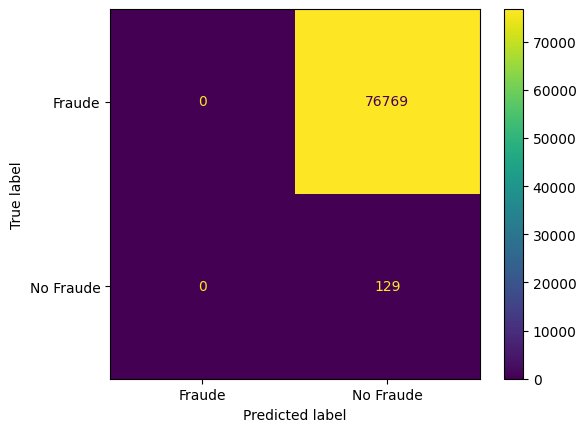

In [225]:
#Matriz 1:
y_Val_Pred_M1 = []

for i in range(0,y_Valores_Prediccion.shape[0]):
  if y_Valores_Prediccion[i][0] > y_Valores_Prediccion[i][0]:
    y_Val_Pred_M1.append(0)
  else:
    y_Val_Pred_M1.append(1)
    
y_Val_Pred = np.array(y_Val_Pred_M1)

Matriz1 = confusion_matrix(y_Datos_test, y_Val_Pred)

Matriz1_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Matriz1, display_labels = ['Fraude', 'No Fraude'])
Matriz1_display.plot()
plt.show()


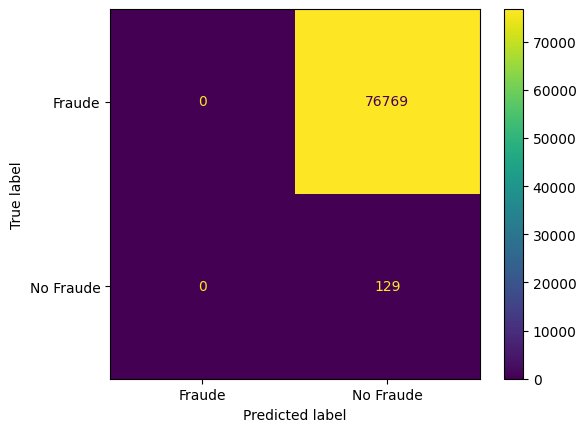

In [226]:
#Matriz 2:

Error_Cuadratico_M = np.mean(np.power(y_Datos_Test_Cat - y_Valores_Prediccion,2), axis = 1)

umbral_fijo = 0.75

y_Val_Pred_M2 = [1 if e > umbral_fijo else 0 for e in Error_Cuadratico_M]

Matriz2 = confusion_matrix(y_Datos_test, y_Val_Pred_M2)

Matriz2_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Matriz1, display_labels = ['Fraude', 'No Fraude'])
Matriz2_display.plot()
plt.show()